# Assn10:  K-Means and KNN


The goals of this assignment are:

1. To conduct both **unsupervised learning** and **supervised learning** on one dataset.
2. To compare the results of supervised and unsupervised learning.

The learning algorithms used will be:

* Unsupervised learning : &nbsp; &nbsp; **K-Means Clustering**
* Supervised learning : &nbsp; &nbsp; **K-Nearest Neighbors Clustering**



___


⚠️ Note that the following files must be saved in the *same folder* as this notebook:

* **lecture12util.py** : &nbsp; &nbsp; a utility module for Lecture 12
* **Assn10-dataset.csv** : &nbsp; &nbsp; dataset to be used for *unsupervised* learning
* **Assn10-dataset-with-labels.csv** : &nbsp; &nbsp; dataset to be used for *supervised* learning


In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import lecture12util as lu

___

## Part 1:  &nbsp; Unsupervised learning

<br>

Part 1 uses:

* Learning algorithim: &nbsp; **K-Means Clustering**
* Data file: &nbsp; **Assn10-dataset.csv**

### Task 1.1

Execute the code in the cell below to verify that you can successfully load and plot the dataset.

Note that this dataset contains 100 observations for each of two variables.

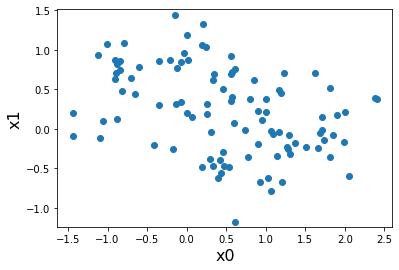

In [2]:
# run the code in this cell to verify that you can load and plot the data

fnameCSV = 'Assn10-dataset.csv' 
x = np.loadtxt(fnameCSV, delimiter=',') 

plt.figure()
ax = plt.axes()
ax.plot(x[:,0], x[:,1], 'o')
ax.set_xlabel('x0', size=16)
ax.set_ylabel('x1', size=16)
ax.axis('equal')
plt.show()

### Task 1.2

Run unsupervised learning on this dataset.

Use K-Means Clustering with two clusters.

Use `lu.plot_labeled_points` to plot the results.


Fitted cluster labels:  [0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1
 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1]


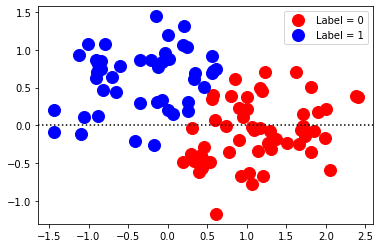

In [3]:
# (Enter code here)
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(x)
labels = kmeans.labels_
print( f'Fitted cluster labels:  {labels}' )
lu.plot_labeled_points(x, labels, colors=['r','b'])

### Question 1.1

Are these clusters well separated?

Answer "Yes" or "No"

<span style="background-color:powderblue;">No because dw values are high</span>

### Task 1.3

Use `lu.average_distances` to justify your answer to Question 1.1.

In [4]:
# (Enter code here)
dw,db   = lu.average_distances(x, labels, ratios=True)
print(dw, db)

[0.77080194 0.8081959 ] 1.0


<br>
<br>
<br>

___

## Part 2:  &nbsp; Supervised learning

<br>

Part 2 uses:

* Learning algorithim: &nbsp; **K-Nearest Neighbors Clustering**
* Data file: &nbsp; **Assn10-dataset-with-labels.csv**

### Task 2.1

Run the code in the cell below to verify that you can load the data file and separate the columns into data and labels.

In [10]:
# run the code in this cell to verify that you can load and plot the data
fnameCSV = 'Assn10-dataset-with-labels.csv' 
A        = np.loadtxt(fnameCSV, delimiter=',') 
x        = A[:,0:2]  # the data are stored in first two columns
labels   = np.asarray( A[:,2] , dtype=int)  # the labels are stored in the third column


# count unique labels
count = []
for i in labels:
    m = 0
    for j in count:
        if i == j:
            m = 1
    if m==0:
        count.append(i)
        
print(count)
print(len(count))

[1, 0]
2


### Question 2.1

How many unique labels does this dataset have?

<span style="background-color:powderblue;">2</span>

### Task 2.2

Use `lu.plot_labeled_points` to plot the labeled data.

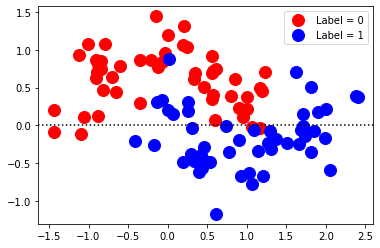

In [6]:
# (Enter code here)
lu.plot_labeled_points(x, labels, colors=['r','b'])
plt.legend()
plt.show()

### Question 2.2

Is there more overlap between the clusters than the K-Means results?   &nbsp; &nbsp; (see Task 1.2 results)

Answer "Yes" or "No"

<span style="background-color:powderblue;">Yes</span>

### Task 2.3

Use KNN to conduct supervised classification, then use `lu.plot_decision_surface` to plot the decision surface.

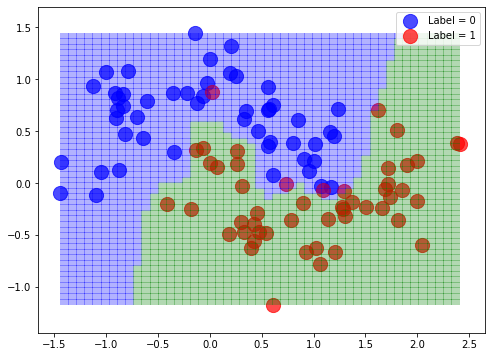

In [7]:
# (Enter code here)
knn    = KNeighborsClassifier(n_neighbors=2)
knn.fit(x, labels)
plt.figure( figsize=(8,6) )
lu.plot_decision_surface(knn, colors=['b','r','g'], n=50, alpha=0.3, marker_size=200, marker_alpha=0.7)

### Question 2.3

Does the decision boundary look linear, like in the K-Means analysis?   &nbsp; &nbsp; (see Task 1.2 results)

Answer "Yes" or "No"

<span style="background-color:powderblue;">No</span>

### Question 2.4

What is the classification rate for this fitted KNN classifier?

Answer this question in a Python cell using `lu.classification_rate`.

In [8]:
# (Enter code here)

x_train,x_test,labels_train,labels_test = lu.get_random_train_test_sets(x, labels, ntest=2)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, labels_train)
labels_predicted = knn.predict(x_test)

cr = lu.classification_rate(labels_test, labels_predicted)

print(f'Actual test set labels: {labels_test}')
print(f'Predicted labels: {labels_predicted}')
print(f'Classification rate: {cr}')

Actual test set labels: [1 1]
Predicted labels: [0 1]
Classification rate: 0.5


<br>
<br>
<br>

___

# BONUS (+1)

Use iterative simulation to validate the classification rate you calculated in Question 2.4.

Use 10 observations for the test set and at least 100 iterations.

In [9]:
# (Enter code here)

np.random.seed(0)
CR          = []  # store the classification rates for each iteration
niterations = 100

for i in range(niterations):
    x_train,x_test,labels_train,labels_test = lu.get_random_train_test_sets(x, labels, ntest=10)
    knn     = KNeighborsClassifier(n_neighbors=7)
    knn.fit(x_train, labels_train)
    labelsp = knn.predict(x_test)
    cr      = lu.classification_rate(labels_test, labelsp)
    CR.append(cr)
cr  = np.mean(CR)


print(f'Classification rates from individual iterations: {CR}')
print()
print(f'Overall classification rate: {cr}')

Classification rates from individual iterations: [1.0, 0.875, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 1.0, 0.8, 1.0, 1.0, 0.9, 1.0, 1.0, 1.0, 0.8, 1.0, 1.0, 0.9, 1.0, 1.0, 1.0, 0.9, 1.0, 0.8888888888888888, 0.9, 1.0, 1.0, 0.9, 0.7, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 1.0, 1.0, 1.0, 1.0, 0.9, 1.0, 1.0, 0.9, 1.0, 0.9, 1.0, 0.9, 0.875, 0.8888888888888888, 1.0, 1.0, 1.0, 1.0, 0.8, 0.9, 0.9, 1.0, 1.0, 0.9, 1.0, 1.0, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 1.0, 0.8888888888888888, 1.0, 0.6, 1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.7777777777777778, 1.0, 0.9, 0.9, 0.9, 1.0, 1.0, 1.0, 1.0, 0.9, 0.8, 0.9, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0]

Overall classification rate: 0.9516111111111113
